In [2]:
import torch

In [3]:
# case 1

N = 20

random0 = torch.randn(int(N/2),1); random5 = torch.randn(int(N/2),1) + 5

class1_data = torch.hstack([random0, random5])
class2_data = torch.hstack([random5, random0])

class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)
print(class1_data)
print(class2_data)




X = torch.vstack([class1_data,class2_data])
y = torch.vstack([class1_label,class2_label])

tensor([[ 1.2821,  4.3592],
        [-0.3658,  3.4346],
        [ 0.7494,  4.3905],
        [ 1.2929,  6.1970],
        [-1.2930,  4.4859],
        [-0.5430,  5.3017],
        [ 1.1453,  5.3615],
        [-0.0568,  7.0311],
        [-0.0163,  2.4519],
        [ 0.0095,  4.0049]])
tensor([[ 4.3592,  1.2821],
        [ 3.4346, -0.3658],
        [ 4.3905,  0.7494],
        [ 6.1970,  1.2929],
        [ 4.4859, -1.2930],
        [ 5.3017, -0.5430],
        [ 5.3615,  1.1453],
        [ 7.0311, -0.0568],
        [ 2.4519, -0.0163],
        [ 4.0049,  0.0095]])


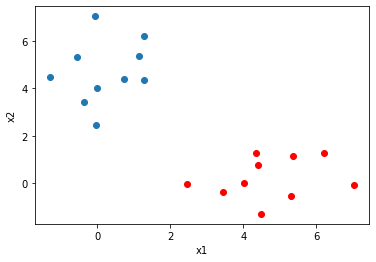

In [4]:
import matplotlib.pyplot as plt

plt.plot(class1_data[:,0],class1_data[:,1], 'o')
plt.plot(class2_data[:,0],class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#모델 만들기

In [5]:
from torch import nn

class MLP(nn.Module) :
    def __init__(self):
        super().__init__()

        self.fcs = nn.Sequential(nn.Linear(2,10),
                                 nn.Sigmoid(), 
                                 nn.Linear(10,1),
                                 nn.Sigmoid())
    def forward(self, x):
        x = self.fcs(x)
        return x

        

In [6]:
model = MLP()
print(model)

print(model(torch.randn(5,2)).shape)

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


# 모델 훈련시키기

In [7]:
from torch import optim
import torch.nn.functional as F

LR = 1e-1
EPOCH = 100

model = MLP()
optimizer = optim.SGD(model.parameters(), lr = LR)

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH) :
    #inference : 모델 통과
    y_hat = model(X)

    # loss
    loss = F.binary_cross_entropy(y_hat,y)
    
    # update
    optimizer.zero_grad() # 초기화(위치 상관 없음)
    loss.backward() # 미분 구하기
    optimizer.step() # 수식에 의한 업데이트

    # print loss

    loss_history += [loss.item()] # item 안쓰면 tensor(0.5), 쓰면 그냥 0.5
    print(f"Epoch:{ep+1}, train loss : {round(loss.item(),3)}")
    

Epoch:1, train loss : 0.869
Epoch:2, train loss : 0.838
Epoch:3, train loss : 0.811
Epoch:4, train loss : 0.787
Epoch:5, train loss : 0.765
Epoch:6, train loss : 0.745
Epoch:7, train loss : 0.728
Epoch:8, train loss : 0.711
Epoch:9, train loss : 0.696
Epoch:10, train loss : 0.682
Epoch:11, train loss : 0.669
Epoch:12, train loss : 0.657
Epoch:13, train loss : 0.645
Epoch:14, train loss : 0.634
Epoch:15, train loss : 0.623
Epoch:16, train loss : 0.613
Epoch:17, train loss : 0.602
Epoch:18, train loss : 0.593
Epoch:19, train loss : 0.583
Epoch:20, train loss : 0.573
Epoch:21, train loss : 0.564
Epoch:22, train loss : 0.555
Epoch:23, train loss : 0.545
Epoch:24, train loss : 0.536
Epoch:25, train loss : 0.528
Epoch:26, train loss : 0.519
Epoch:27, train loss : 0.51
Epoch:28, train loss : 0.501
Epoch:29, train loss : 0.493
Epoch:30, train loss : 0.484
Epoch:31, train loss : 0.476
Epoch:32, train loss : 0.467
Epoch:33, train loss : 0.459
Epoch:34, train loss : 0.451
Epoch:35, train loss : 0

In [8]:
print(F.binary_cross_entropy(y_hat,y))
print(-torch.mean(torch.log(y_hat**y * (1-y_hat)**(1-y)))) # 합이 아니라 평균이다


tensor(0.1401, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1401, grad_fn=<NegBackward0>)


Text(0, 0.5, 'loss')

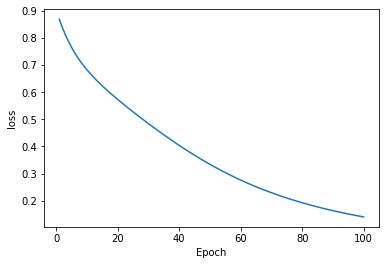

In [9]:
plt.plot(range(1,EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("loss")

# 모델 테스트

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0.5, 0, 'x2')

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


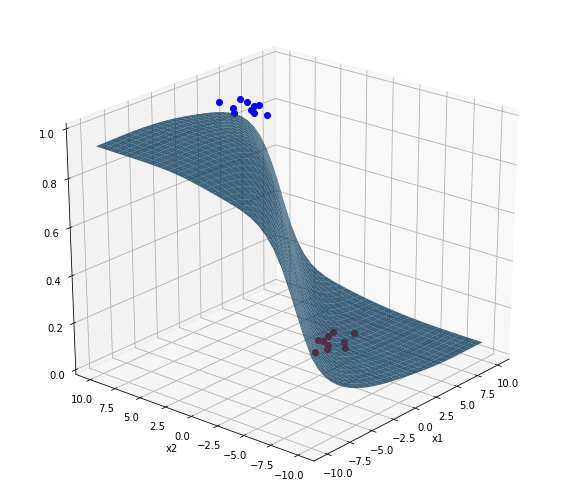

In [10]:
x1_test = torch.linspace(-10, 10, 30)
x2_test = torch.linspace(-10, 10, 30)
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.hstack([X1_test.reshape(-1,1),X2_test.reshape(-1,1)])

model.eval()
with torch.no_grad():
    y_hat = model(X_test)

Y_hat = y_hat.reshape(30,30)

figure = plt.figure(figsize=[10,9])
ax = figure.gca(projection = "3d")
ax.view_init(elev=25, azim=-140)
ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), alpha = 0.8)
plt.plot(class1_data[:,0].squeeze(), class1_data[:,1].squeeze(), class1_label.squeeze(), 'bo')
plt.plot(class2_data[:,0].squeeze(), class2_data[:,1].squeeze(), class2_label.squeeze(), 'ro')
plt.xlabel("x1")
plt.ylabel("x2")

Epoch:1, train loss : 0.205
Epoch:2, train loss : 0.201
Epoch:3, train loss : 0.197
Epoch:4, train loss : 0.193
Epoch:5, train loss : 0.19
Epoch:6, train loss : 0.186
Epoch:7, train loss : 0.183
Epoch:8, train loss : 0.179
Epoch:9, train loss : 0.176
Epoch:10, train loss : 0.173
Epoch:11, train loss : 0.17
Epoch:12, train loss : 0.167
Epoch:13, train loss : 0.164
Epoch:14, train loss : 0.161
Epoch:15, train loss : 0.159
Epoch:16, train loss : 0.156
Epoch:17, train loss : 0.153
Epoch:18, train loss : 0.151
Epoch:19, train loss : 0.149
Epoch:20, train loss : 0.146
Epoch:21, train loss : 0.144
Epoch:22, train loss : 0.142
Epoch:23, train loss : 0.139
Epoch:24, train loss : 0.137
Epoch:25, train loss : 0.135
Epoch:26, train loss : 0.133
Epoch:27, train loss : 0.131
Epoch:28, train loss : 0.129
Epoch:29, train loss : 0.127
Epoch:30, train loss : 0.125
Epoch:31, train loss : 0.123
Epoch:32, train loss : 0.121
Epoch:33, train loss : 0.119
Epoch:34, train loss : 0.118
Epoch:35, train loss : 0.

Text(0.5, 0, 'x2')

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


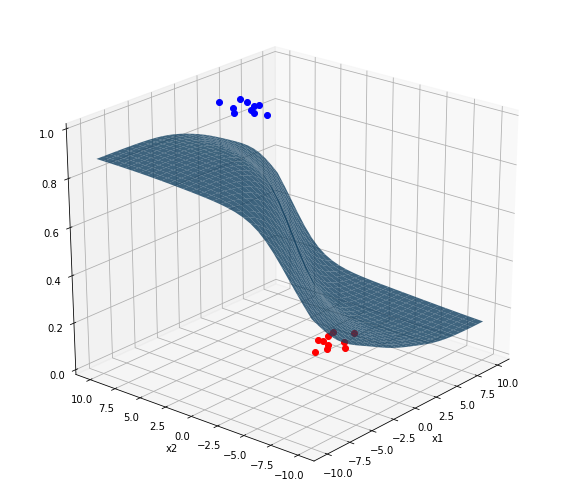

In [11]:
LR = 1e-1
EPOCH = 100

model = MLP()
optimizer = optim.SGD(model.parameters(), lr = LR)

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH) :
    #inference : 모델 통과
    y_hat = model(X)

    # loss
    loss = F.mse_loss(y_hat,y)
    
    # update
    optimizer.zero_grad() # 초기화(위치 상관 없음)
    loss.backward() # 미분 구하기
    optimizer.step() # 수식에 의한 업데이트

    # print loss

    loss_history += [loss.item()] # item 안쓰면 tensor(0.5), 쓰면 그냥 0.5
    print(f"Epoch:{ep+1}, train loss : {round(loss.item(),3)}")
    

x1_test = torch.linspace(-10, 10, 30)
x2_test = torch.linspace(-10, 10, 30)
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.hstack([X1_test.reshape(-1,1),X2_test.reshape(-1,1)])

model.eval()
with torch.no_grad():
    y_hat = model(X_test)

Y_hat = y_hat.reshape(30,30)

figure = plt.figure(figsize=[10,9])
ax = figure.gca(projection = "3d")
ax.view_init(elev=25, azim=-140)
ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), alpha = 0.8)
plt.plot(class1_data[:,0].squeeze(), class1_data[:,1].squeeze(), class1_label.squeeze(), 'bo')
plt.plot(class2_data[:,0].squeeze(), class2_data[:,1].squeeze(), class2_label.squeeze(), 'ro')
plt.xlabel("x1")
plt.ylabel("x2")
# mse보다 likelihood가 더 민감하다
    

Epoch:1, train loss : 0.268
Epoch:2, train loss : 0.266
Epoch:3, train loss : 0.263
Epoch:4, train loss : 0.261
Epoch:5, train loss : 0.258
Epoch:6, train loss : 0.256
Epoch:7, train loss : 0.254
Epoch:8, train loss : 0.251
Epoch:9, train loss : 0.249
Epoch:10, train loss : 0.247
Epoch:11, train loss : 0.245
Epoch:12, train loss : 0.243
Epoch:13, train loss : 0.241
Epoch:14, train loss : 0.238
Epoch:15, train loss : 0.236
Epoch:16, train loss : 0.234
Epoch:17, train loss : 0.232
Epoch:18, train loss : 0.23
Epoch:19, train loss : 0.228
Epoch:20, train loss : 0.226
Epoch:21, train loss : 0.224
Epoch:22, train loss : 0.222
Epoch:23, train loss : 0.221
Epoch:24, train loss : 0.219
Epoch:25, train loss : 0.217
Epoch:26, train loss : 0.215
Epoch:27, train loss : 0.213
Epoch:28, train loss : 0.211
Epoch:29, train loss : 0.209
Epoch:30, train loss : 0.207
Epoch:31, train loss : 0.206
Epoch:32, train loss : 0.204
Epoch:33, train loss : 0.202
Epoch:34, train loss : 0.2
Epoch:35, train loss : 0.1

Text(0.5, 0, 'x2')

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


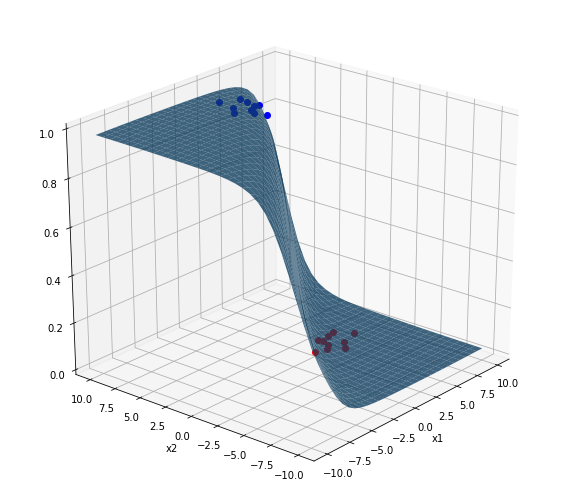

In [12]:
LR = 1e-1
EPOCH = 1000

model = MLP()
optimizer = optim.SGD(model.parameters(), lr = LR)

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH) :
    #inference : 모델 통과
    y_hat = model(X)

    # loss
    loss = F.mse_loss(y_hat,y)
    
    # update
    optimizer.zero_grad() # 초기화(위치 상관 없음)
    loss.backward() # 미분 구하기
    optimizer.step() # 수식에 의한 업데이트

    # print loss

    loss_history += [loss.item()] # item 안쓰면 tensor(0.5), 쓰면 그냥 0.5
    print(f"Epoch:{ep+1}, train loss : {round(loss.item(),3)}")
    

x1_test = torch.linspace(-10, 10, 30)
x2_test = torch.linspace(-10, 10, 30)
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.hstack([X1_test.reshape(-1,1),X2_test.reshape(-1,1)])

model.eval()
with torch.no_grad():
    y_hat = model(X_test)

Y_hat = y_hat.reshape(30,30)

figure = plt.figure(figsize=[10,9])
ax = figure.gca(projection = "3d")
ax.view_init(elev=25, azim=-140)
ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), alpha = 0.8)
plt.plot(class1_data[:,0].squeeze(), class1_data[:,1].squeeze(), class1_label.squeeze(), 'bo')
plt.plot(class2_data[:,0].squeeze(), class2_data[:,1].squeeze(), class2_label.squeeze(), 'ro')
plt.xlabel("x1")
plt.ylabel("x2")
# mse를 쓰더라도 epoch을 1000으로하면 잘함.
    

Epoch:1, train loss : 0.191
Epoch:2, train loss : 0.133
Epoch:3, train loss : 0.089
Epoch:4, train loss : 0.055
Epoch:5, train loss : 0.032
Epoch:6, train loss : 0.017
Epoch:7, train loss : 0.009
Epoch:8, train loss : 0.005
Epoch:9, train loss : 0.003
Epoch:10, train loss : 0.002
Epoch:11, train loss : 0.001
Epoch:12, train loss : 0.001
Epoch:13, train loss : 0.0
Epoch:14, train loss : 0.0
Epoch:15, train loss : 0.0
Epoch:16, train loss : 0.0
Epoch:17, train loss : 0.0
Epoch:18, train loss : 0.0
Epoch:19, train loss : 0.0
Epoch:20, train loss : 0.0
Epoch:21, train loss : 0.0
Epoch:22, train loss : 0.0
Epoch:23, train loss : 0.0
Epoch:24, train loss : 0.0
Epoch:25, train loss : 0.0
Epoch:26, train loss : 0.0
Epoch:27, train loss : 0.0
Epoch:28, train loss : 0.0
Epoch:29, train loss : 0.0
Epoch:30, train loss : 0.0
Epoch:31, train loss : 0.0
Epoch:32, train loss : 0.0
Epoch:33, train loss : 0.0
Epoch:34, train loss : 0.0
Epoch:35, train loss : 0.0
Epoch:36, train loss : 0.0
Epoch:37, tra

Text(0.5, 0, 'x2')

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


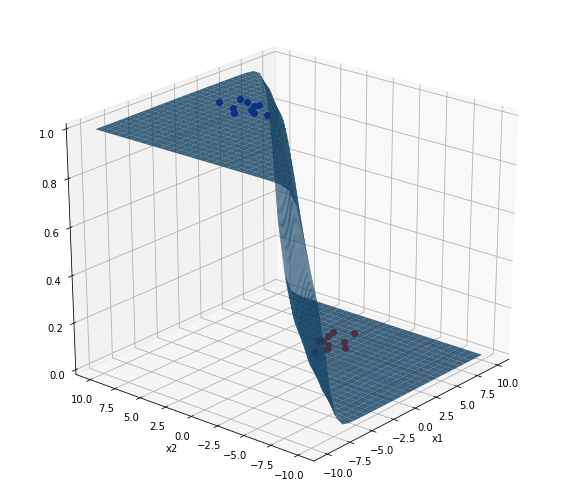

In [13]:
LR = 1e-1
EPOCH = 100

model = MLP()
optimizer = optim.Adam(model.parameters(), lr = LR)

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH) :
    #inference : 모델 통과
    y_hat = model(X)

    # loss
    loss = F.mse_loss(y_hat,y)
    
    # update
    optimizer.zero_grad() # 초기화(위치 상관 없음)
    loss.backward() # 미분 구하기
    optimizer.step() # 수식에 의한 업데이트

    # print loss

    loss_history += [loss.item()] # item 안쓰면 tensor(0.5), 쓰면 그냥 0.5
    print(f"Epoch:{ep+1}, train loss : {round(loss.item(),3)}")
    

x1_test = torch.linspace(-10, 10, 30)
x2_test = torch.linspace(-10, 10, 30)
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.hstack([X1_test.reshape(-1,1),X2_test.reshape(-1,1)])

model.eval()
 
with torch.no_grad():
    y_hat = model(X_test)

Y_hat = y_hat.reshape(30,30)

figure = plt.figure(figsize=[10,9])
ax = figure.gca(projection = "3d")
ax.view_init(elev=25, azim=-140)
ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), alpha = 0.8)
plt.plot(class1_data[:,0].squeeze(), class1_data[:,1].squeeze(), class1_label.squeeze(), 'bo')
plt.plot(class2_data[:,0].squeeze(), class2_data[:,1].squeeze(), class2_label.squeeze(), 'ro')
plt.xlabel("x1")
plt.ylabel("x2")
# optimizer 을 Adam으로 하면 에폭을 100만해도 좋음.
    

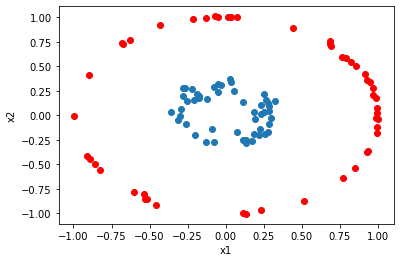

In [14]:
N = 100

radius1 = 0.3+ 0.05 * torch.randn(int(N/2),1)
radius2 = 1+ 0.01 * torch.randn(int(N/2),1)
theta1 = 2 * torch.pi * torch.rand(int(N/2),1) - torch.pi
theta2 = 2 * torch.pi * torch.rand(int(N/2),1) - torch.pi

class1_data = torch.hstack([radius1 * torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data = torch.hstack([radius2 * torch.cos(theta2), radius2*torch.sin(theta2)])

class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)
X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

import matplotlib.pyplot as plt

plt.plot(class1_data[:,0],class1_data[:,1], 'o')
plt.plot(class2_data[:,0],class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [15]:
from torch import nn

class MLP(nn.Module) :
    def __init__(self):
        super().__init__()

        self.fcs = nn.Sequential(nn.Linear(2,10),
                                 nn.Sigmoid(), 
                                 nn.Linear(10,1),
                                 nn.Sigmoid())
    def forward(self, x):
        x = self.fcs(x)
        return x

        

Epoch:1, train loss : 0.717
Epoch:2, train loss : 0.693
Epoch:3, train loss : 0.706
Epoch:4, train loss : 0.695
Epoch:5, train loss : 0.684
Epoch:6, train loss : 0.684
Epoch:7, train loss : 0.687
Epoch:8, train loss : 0.683
Epoch:9, train loss : 0.676
Epoch:10, train loss : 0.67
Epoch:11, train loss : 0.666
Epoch:12, train loss : 0.664
Epoch:13, train loss : 0.66
Epoch:14, train loss : 0.653
Epoch:15, train loss : 0.644
Epoch:16, train loss : 0.636
Epoch:17, train loss : 0.629
Epoch:18, train loss : 0.621
Epoch:19, train loss : 0.612
Epoch:20, train loss : 0.602
Epoch:21, train loss : 0.591
Epoch:22, train loss : 0.581
Epoch:23, train loss : 0.57
Epoch:24, train loss : 0.56
Epoch:25, train loss : 0.548
Epoch:26, train loss : 0.536
Epoch:27, train loss : 0.523
Epoch:28, train loss : 0.511
Epoch:29, train loss : 0.499
Epoch:30, train loss : 0.485
Epoch:31, train loss : 0.471
Epoch:32, train loss : 0.457
Epoch:33, train loss : 0.442
Epoch:34, train loss : 0.426
Epoch:35, train loss : 0.41

Text(0.5, 0, 'x2')

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


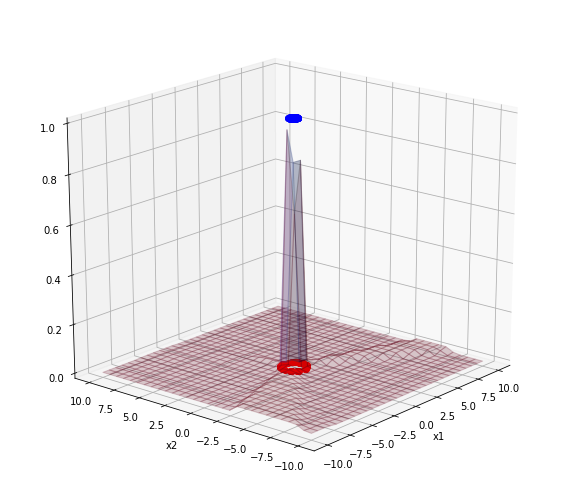

In [16]:
LR = 1e-1
EPOCH = 100

model = MLP()
optimizer = optim.Adam(model.parameters(), lr = LR)

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH) :
    #inference : 모델 통과
    y_hat = model(X)

    # loss
    loss = F.binary_cross_entropy(y_hat,y)
    
    # update
    optimizer.zero_grad() # 초기화(위치 상관 없음)
    loss.backward() # 미분 구하기
    optimizer.step() # 수식에 의한 업데이트

    # print loss

    loss_history += [loss.item()] # item 안쓰면 tensor(0.5), 쓰면 그냥 0.5
    print(f"Epoch:{ep+1}, train loss : {round(loss.item(),3)}")
    

x1_test = torch.linspace(-10, 10, 30)
x2_test = torch.linspace(-10, 10, 30)
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.hstack([X1_test.reshape(-1,1),X2_test.reshape(-1,1)])

model.eval()
 
with torch.no_grad():
    y_hat = model(X_test)

Y_hat = y_hat.reshape(30,30)

from matplotlib.colors import LightSource

figure = plt.figure(figsize=[10,9])
ax = figure.gca(projection = "3d")
ax.view_init(elev=20, azim=-140)
ls = LightSource(azdeg = 45, altdeg = 30)
rgb = ls.shade(Y_hat.numpy(), plt.cm.RdYlBu)
ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), alpha = 0.2, facecolors = rgb)
plt.plot(class1_data[:,0].squeeze(), class1_data[:,1].squeeze(), class1_label.squeeze(), 'bo')
plt.plot(class2_data[:,0].squeeze(), class2_data[:,1].squeeze(), class2_label.squeeze(), 'ro')
plt.xlabel("x1")
plt.ylabel("x2")
# optimizer 을 Adam으로 하면 에폭을 100만해도 좋음.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [19]:
torch.cuda.is_available()

True